In [1]:
import os

os.system('sudo dtoverlay w1-gpio gpiopin=4 pullup=0')
os.system('sudo dtoverlay w1-gpio gpiopin=17 pullup=0')

* Failed to apply overlay '2_w1-gpio' (kernel)
* Failed to apply overlay '2_w1-gpio' (kernel)


256

In [2]:
import time
import numpy
import sys

temp_sensor1_id = '28-3ce1d44312b4'
temp_sensor2_id = '28-3ce1d4432b6f'

class TempSensor():
    def __init__(self, serial):
        self.temp_sensor = f'/sys/bus/w1/devices/{serial}/w1_slave'

    def temp(self):
        with open(self.temp_sensor, 'r') as tmpfile:
            temp = float(tmpfile.readlines()[1][-6:-1])/1000
        return temp

ts1 = TempSensor(temp_sensor1_id)
ts2 = TempSensor(temp_sensor2_id)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [ ]:
os.environ['TZ'] = 'US/Pacific'
time.tzset()

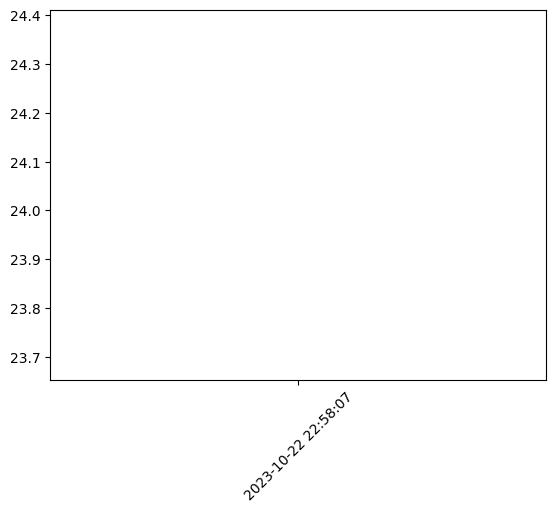

| 2023-10-22 22:58:28: | T1: 23.812 °C | T2: 29.187 °C |

In [ ]:
t1s = []
t2s = []
times = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(axis='x', labelrotation=45)

while True:        
    t1 = ts1.temp()
    t2 = ts2.temp()
    now = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    
    t1s.append(t1)
    t2s.append(t2)
    times.append(now)
    print(f'| {now}: | T1: {t1:.3f} °C | T2: {t2:.3f} °C |', end='')
    
    if True:
        ax.cla()
        ax.plot(times[-60:], t1s[-60:])
        ax.plot(times[-60:], t2s[-60:])        
        display(fig)    
        clear_output(wait=True)
        plt.pause(10)